In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
data= pd.read_excel("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
t= np.arange(2,98)
data['t']=t
data['t_square']=data['t']*data['t']

log_Passengers=np.log(data['Passengers'])
data['log_Passengers']=log_Passengers

In [4]:
data

,Month,Passengers,t,t_square,log_Passengers
0,1995-01-01,112,2,4,4.718499
1,1995-02-01,118,3,9,4.770685
2,1995-03-01,132,4,16,4.882802
3,1995-04-01,129,5,25,4.859812
4,1995-05-01,121,6,36,4.795791
...,...,...,...,...,...
91,2002-08-01,405,93,8649,6.003887
92,2002-09-01,355,94,8836,5.872118
93,2002-10-01,306,95,9025,5.723585
94,2002-11-01,271,96,9216,5.602119


In [5]:
data['month'] = pd.DatetimeIndex(data['Month']).month

In [6]:
data.head()

,Month,Passengers,t,t_square,log_Passengers,month
0,1995-01-01,112,2,4,4.718499,1
1,1995-02-01,118,3,9,4.770685,2
2,1995-03-01,132,4,16,4.882802,3
3,1995-04-01,129,5,25,4.859812,4
4,1995-05-01,121,6,36,4.795791,5


In [7]:
data['month'] = data['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                      ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

In [8]:
airplane = pd.get_dummies(data,   prefix='',   prefix_sep='',   columns=['month'])
airplane.head()

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,2,4,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,3,9,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,4,16,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,5,25,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,6,36,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

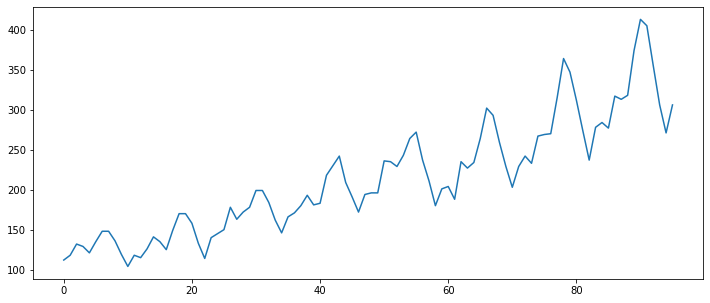

In [9]:
airplane['Passengers'].plot(figsize=(12,5))

<AxesSubplot:>

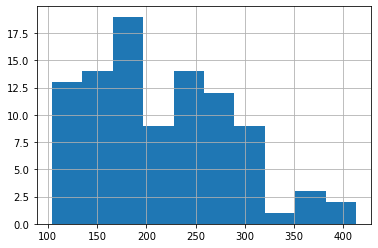

In [10]:
airplane['Passengers'].hist()

# Splitting the data :-

In [11]:
train = airplane.head(132)
test = airplane.tail(12)
train

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,2,4,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,3,9,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,4,16,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,5,25,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,6,36,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,93,8649,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,94,8836,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,95,9025,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,96,9216,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
test

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,86,7396,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,87,7569,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,88,7744,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,89,7921,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,90,8100,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,91,8281,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,92,8464,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,93,8649,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,94,8836,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,95,9025,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
import statsmodels.formula.api as smf

# Linear model :-

In [14]:
model1 = smf.ols('Passengers~t', data=train).fit()

In [15]:
pred_linear = model1.predict(test.t)
pred_linear

84    298.925337
85    301.260049
86    303.594762
87    305.929474
88    308.264187
89    310.598899
90    312.933611
91    315.268324
92    317.603036
93    319.937749
94    322.272461
95    324.607174
dtype: float64

In [16]:
rmse_linear = np.sqrt(np.mean(pred_linear-test.Passengers)**2)
rmse_linear

16.48374480014461

# Exponential model :-

In [17]:
model2 = smf.ols('log_Passengers~t', data=train).fit()

In [18]:
pred_expo = np.exp(model2.predict(test.t))
pred_expo

84    303.795802
85    307.202576
86    310.647555
87    314.131165
88    317.653840
89    321.216019
90    324.818145
91    328.460664
92    332.144031
93    335.868704
94    339.635145
95    343.443823
dtype: float64

In [19]:
rmse_expo = np.sqrt(np.mean(pred_expo-test.Passengers)**2)
rmse_expo

4.998544235085163

# Quadratic model :-

In [20]:
model3 = smf.ols('Passengers~t+t_square', data=train).fit()

In [21]:
pred_quad = model3.predict(test[['t','t_square']])
pred_quad

84    305.124274
85    308.271842
86    311.441378
87    314.632884
88    317.846359
89    321.081803
90    324.339216
91    327.618598
92    330.919950
93    334.243270
94    337.588559
95    340.955817
dtype: float64

In [22]:
rmse_quad = np.sqrt(np.mean(pred_quad-test.Passengers)**2)
rmse_quad

5.4113374162512144

# Additive Seasonality model :-

In [23]:
model4 = smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [24]:
pred_add_seas = model4.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
pred_add_seas

84    282.250
85    282.125
86    311.000
87    305.125
88    305.125
89    333.125
90    359.875
91    358.125
92    329.875
93    301.750
94    277.000
95    302.625
dtype: float64

In [25]:
rmse_add_seas = np.sqrt(np.mean(pred_add_seas-test.Passengers)**2)
rmse_add_seas

15.916666666666677

# Additive Seasonability Quadratic model :-

In [26]:
model5 = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [27]:
pred_add_seas_quad = model5.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])

In [28]:
pred_add_seas_quad

84    288.491036
85    289.326196
86    319.161355
87    314.246515
88    315.206674
89    344.166834
90    371.876993
91    371.087153
92    343.797312
93    316.632471
94    292.842631
95    319.427790
dtype: float64

In [29]:
rmse_add_seas_quad = np.sqrt(np.mean(pred_add_seas_quad-test.Passengers)**2)
rmse_add_seas_quad

4.394753251383553

# Multiplicative Seasonality model :-

In [30]:
model6 = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [31]:
pred_multi_seas = np.exp(model6.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [32]:
pred_multi_seas

84    280.347839
85    283.313952
86    326.926267
87    316.360477
88    314.303607
89    355.740518
90    395.620652
91    394.784174
92    353.576683
93    310.439400
94    272.472660
95    312.337712
dtype: float64

In [33]:
rmse_multi_seas = np.sqrt(np.mean(pred_multi_seas-test.Passengers)**2)
rmse_multi_seas

1.8980049424805117

In [34]:
dict_ = { 'Model': ('Linear model','Exponential model','Quadratic model','Additive Seasonality model ','Additive Seasonability Quadratic model','Multiplicative Seasonality model'),
           'Rmse_values': (rmse_linear, rmse_expo, rmse_quad, rmse_add_seas, rmse_add_seas_quad, rmse_multi_seas)}

In [35]:
table = pd.DataFrame(dict_)

In [36]:
table.sort_values('Rmse_values')

,Model,Rmse_values
5,Multiplicative Seasonality model,1.898005
4,Additive Seasonability Quadratic model,4.394753
1,Exponential model,4.998544
2,Quadratic model,5.411337
3,Additive Seasonality model,15.916667
0,Linear model,16.483745



we have to created a lots of dummy variables which are as follows :-'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'

Also have to created a another columns for using in other models are as follows :-
squared_t , log_Passenger, t


We have created total 6 models and there rmse values are given in above table.


from all the models Additive Seasonability Quadratic model gives good accuracy compared to other model

In [37]:
final= smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=airplane).fit()

In [38]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.20e-53
Time:                        22:49:20   Log-Likelihood:                -385.97
No. Observations:                  96   AIC:                             799.9
Df Residuals:                      82   BIC:                             835.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.7245      4.399     24.486      0.000      98.973     116.476
t              1.2166      0.221      5.495      0.000       0.776       1.657
t_square       0.0114      0.002      5.271      0.000       0.007       0.016
Jan           -8.4007      4.947     -1.698      0.093     -18.241       1.440
Feb          -10.7596      4.947     -2.175      0.033     -20.601      -0.918
Mar           15.8587      4.948      3.205      0.002       6.015      25.702
Apr            7.7040      4.949      1.557      0.123      -2.142      17.550
May            5.4015      4.951      1.091      0.278      -4.447      15.250
Jun           31.0762      4.953      6.274      0.000      21.223      40.929
Jul           55.4780      4.955     11.196      0.000      45.621      65.335
Aug           51.3569      4.958     10.359      0.000      41.495      61.219
Sep           20.7129      4.961      4.176      0.000      10.845      30.581
Oct           -9.8288      4.964     -1.980      0.051     -19.704       0.046
Nov          -37.0185      4.968     -7.452      0.000     -46.900     -27.137
Dec          -13.8560      4.972     -2.787      0.007     -23.746      -3.966
==============================================================================
Omnibus:                        2.693   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.174
Skew:                           0.357   Prob(JB):                        0.337
Kurtosis:                       3.181   Cond. No.                     9.41e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

------------------------------------------------------------END------------------------------------------------------------------------------------